In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import pprint
import csv
from api_keys import api_key
from citipy import citipy
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Starter code
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

619

In [3]:
def Weather_Data(cities, apikey):
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload  = {"appid": api_key,
                "q": cities,
                "units": "imperial"
               }
    r = requests.get(url, params=payload)
    if r.status_code == 200:
        return r.json()
    else:
        return None

In [ ]:
Weather_Data(cities, api_key)
data = []
for city in cities:
    result = Weather_Data(city, api_key)
    if result:
        data.append(result)

In [48]:
Weather_Frame = pd.DataFrame([{
                "City Name": d["name"],
                "Latitude": d["coord"]["lat"],
                "Temperature Maximum (f)": d["main"]["temp_max"],
                "Humidity (%)": d["main"]["humidity"],
                "Cloudiness(%)": d["clouds"]["all"],
                "Wind Speed (mph)": d["wind"]["speed"]
    } for d in data])

In [49]:
Weather_Frame

City Name  Latitude  Temperature Maximum (f)  Humidity (%)  \
0     Marbella     36.51                    59.00            87   
1    Cape Town    -33.93                    68.00            82   
2       Dikson     73.51                    17.56            91   
3      Qaanaaq     77.48                   -25.65            47   
4    Muscatine     41.42                    44.60            73   
..         ...       ...                      ...           ...   
548      Kenai     60.55                     0.00            76   
549    Emerald    -23.53                    75.20            73   
550       Mayo     63.59                   -23.80            74   
551  Masterton    -40.95                    68.00            58   
552    Curvelo    -18.76                    73.22            92   

     Cloudiness(%)  Wind Speed (mph)  
0               20              3.36  
1               75              9.17  
2               95             20.65  
3                0              4.12  
4               90             31.09  
..             ...               ...  
548              1              5.82  
549              0              4.70  
550             75              2.24  
551              0              1.01  
552            100              5.95  

[553 rows x 6 columns]

In [56]:
Weather_Frame.to_csv("Weather_Frame.csv", index = False)

#### Latitude vs. Temperature Plot

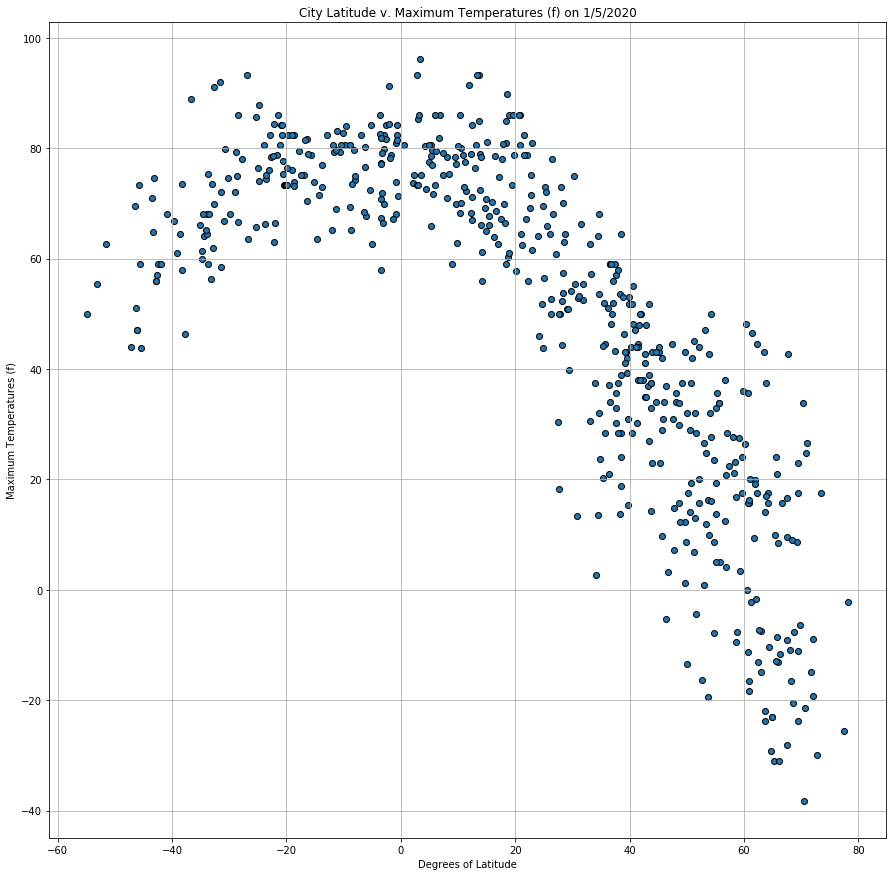

In [57]:
x = Weather_Frame["Latitude"]
y = Weather_Frame["Temperature Maximum (f)"]
plt.scatter(x, y, marker = "o", edgecolors = "black")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Maximum Temperatures (f)")
plt.title ("City Latitude v. Maximum Temperatures (f) on 1/5/2020")
plt.grid(axis = "y")
plt.grid(axis = "x")
plt.rcParams["figure.figsize"] = (15,15)
plt.savefig("Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

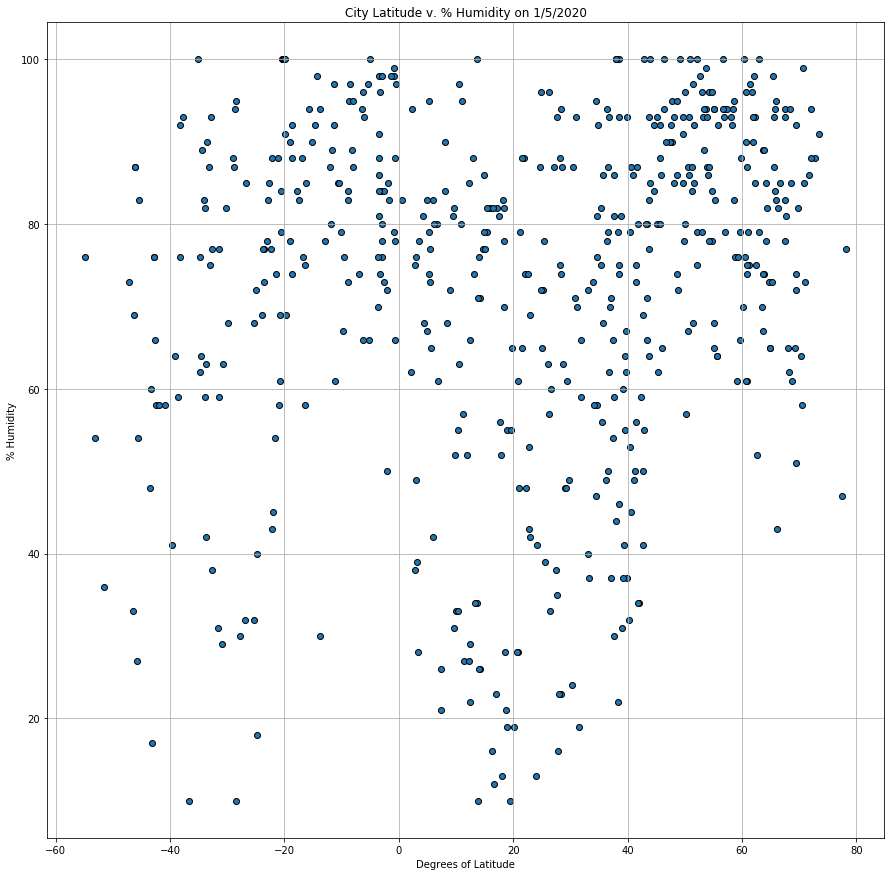

In [58]:
x = Weather_Frame["Latitude"]
y = Weather_Frame["Humidity (%)"]
plt.scatter(x, y, marker = "o", edgecolors = "black")
plt.xlabel("Degrees of Latitude")
plt.ylabel("% Humidity")
plt.title ("City Latitude v. % Humidity on 1/5/2020")
plt.grid(axis = "y")
plt.grid(axis = "x")
plt.rcParams["figure.figsize"] = (15,15)
plt.savefig("humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

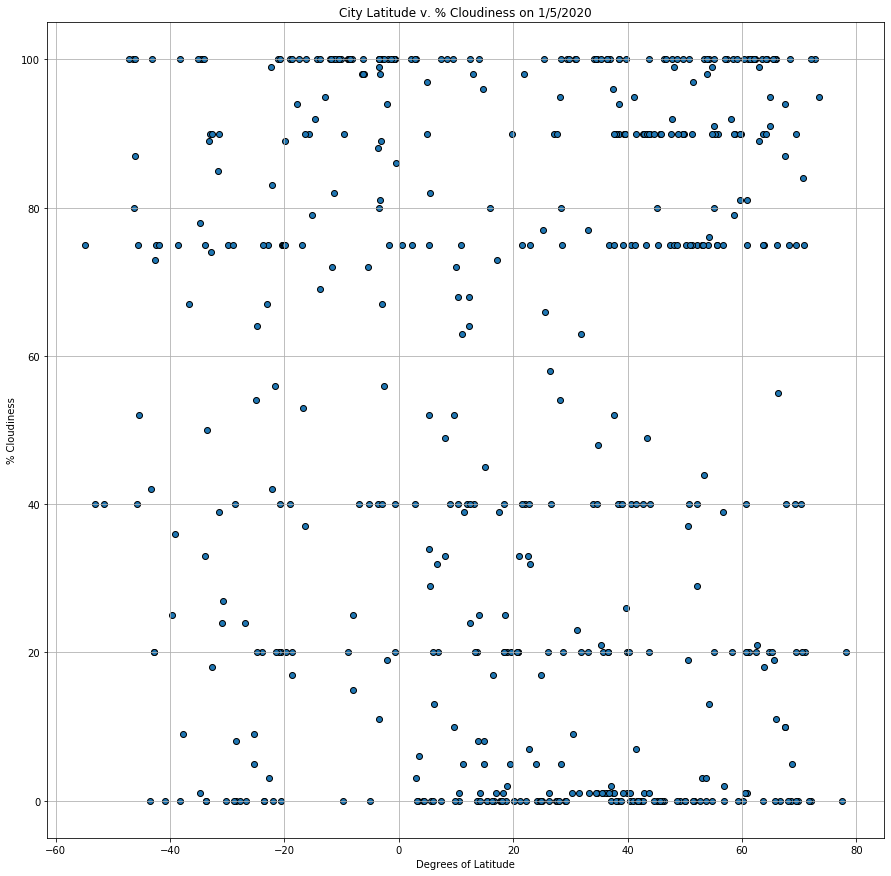

In [59]:
x = Weather_Frame["Latitude"]
y = Weather_Frame["Cloudiness(%)"]
plt.scatter(x, y, marker = "o", edgecolors = "black")
plt.xlabel("Degrees of Latitude")
plt.ylabel("% Cloudiness")
plt.title ("City Latitude v. % Cloudiness on 1/5/2020")
plt.grid(axis = "y")
plt.grid(axis = "x")
plt.rcParams["figure.figsize"] = (15,15)
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

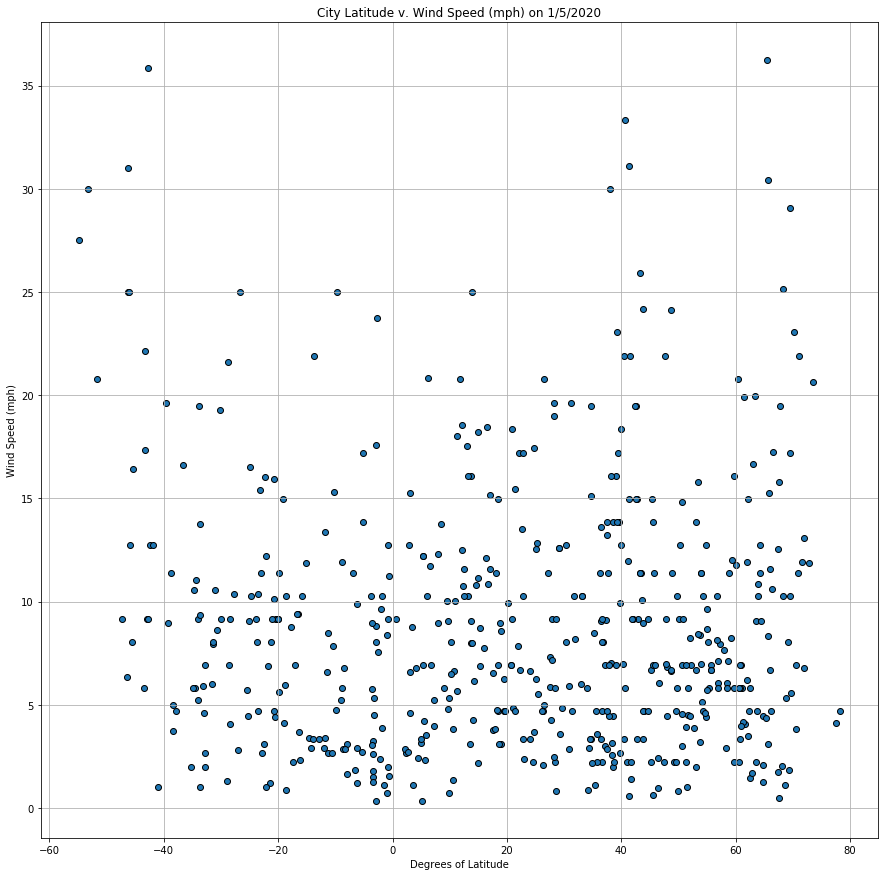

In [60]:
x = Weather_Frame["Latitude"]
y = Weather_Frame["Wind Speed (mph)"]
plt.scatter(x, y, marker = "o", edgecolors = "black")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title ("City Latitude v. Wind Speed (mph) on 1/5/2020")
plt.grid(axis = "y")
plt.grid(axis = "x")
plt.rcParams["figure.figsize"] = (15,15)
plt.savefig("Wind_Speed.png")
plt.show()